# Given a Model of the World

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Markov-Process">Markov Process</a></li>
    <li>2. <a href="#2.-Markov-Reward-Process-(MRP)">Markov Reward Process (MRP)</a></li>
    <li>3. <a href="#3.-Markov-Decision-Process-(MDP)">Markov Decision Process (MDP)</a></li>
    <li>4. <a href="#4.-Policy-Search">Policy Search</a>
        <ul>
            <li>4.1. <a href="#4.1.-Policy-Iteration">Policy Iteration</a></li>
            <li>4.2. <a href="#4.2.-Value-Iteration">Value Iteration</a></li>
        </ul>
    </li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

__Note__ : This lecture is about a model of the world. This is not the world estimate model of the agent. This means we _know_ the world and it's fully observable. Also, note that bandits can be thought of a single state MDP. Another note, the following lecture will be based on finite markov processes. 

# 1. Markov Process

> __Markov Property__ : the memoryless property of a stochastic process (i.e. a random process won't have any sort of memory or temporal pattern)

> __Markov Process or Markov Chain__ : sequence of random memoryless states with markov property (more details about its definition are below)

* $S$ is a (finite in this case but can be infinite) set of states $(s \in S)$
* $P$ is a dynamics/transition model $P(s_{t + 1} = s'~|~s_{t} = s)$
* no rewards and no actions
* we can express a finite number of $(N)$ states as a matrix $P$ (of shape $N x N$) which contains the probabilities of transitioning from one state to another for all possible pairings

$$
  P =
  \left[ {\begin{array}{cccc}
    P(s_{1}~|~s_{1}) & P(s_{2}~|~s_{1}) & \cdots & P(s_{N}~|~s_{1})\\
    P(s_{1}~|~s_{2}) & P(s_{2}~|~s_{2}) & \cdots & P(s_{N}~|~s_{2})\\
    \vdots & \vdots & \ddots & \vdots\\
    P(s_{1}~|~s_{N}) & P(s_{2}~|~s_{N}) & \cdots & P(s_{N}~|~s_{N})\\
  \end{array} } \right]
$$

Say we start at state $s$ which can be represented as a one-hot encoded vector of length $N$.

$$
s_{t} = \begin{bmatrix}
    1 \\
    0 \\
    \vdots \\
	0
\end{bmatrix}
$$

We can calculate the dot product between this one-hot encoded vector of our starting state $s$ and the state-to-state transition matrix $P$: $(s_{t})^{T}P = s_{t + 1}$
This equation basically tells us the probability of heading to every state in the state space $S$ given we are currently in state $s$. Notice how we aren't ever learning or optimizing for anything. This is simply a mathematical tool for moving from state to state. Also understand that $P$ is given because we have a model of our world.

# 2. Markov Reward Process (MRP)

> __Markov Reward Process (MRP)__ : markov chain with rewards (more details about definition below)

* $S$ is a (finite in this case but can be infinite) set of states $(s \in S)$
* $P$ is a dynamics/transition model $P(s_{t + 1} = s'~|~s_{t} = s)$
* no actions
* $R$ is a reward function $R(s_{t} = s) = \mathbb{E}[r_{t}~|~s_{t} = s]$ with discount factor $\gamma \in [0, 1]$
* in a finite number of states, we can express $R$ as a vector

Remember, reward functions vary and can be parameterized by the state $R(s)$, state and action $R(s, a)$, and also state-action-next-state $R(s, a, s')$. And a sidenote on notation, $s = s_{t}$ and $s' = s_{t + 1}$.

In this case, because we have no actions, our reward function looks like $R(s)$ which is the expected reward for being in state $s$.

Also, because we now have a reward, that means we can optimize for something (or rather formulate a mathematical way to determine how good each state is)! So now the lecture will focus on that.

> __Horizon__ : number of time steps in each episode (can be infinite). Markov processes can be _infinite_ or _finite_ horizons like how reward functions can be infinite or finite.

> __Return ($G_{t}$)__ : discounted sum of rewards from time step $t$ to horizon 

> __State Value Function ($V(s)$)__ : expected return from starting in state $s$

$$
G_{t} = r_{t} + \gamma r_{t + 1} + \gamma^{2} r_{t + 2} + ... \hspace{1em} (Eq.~1)\\
V(s) = \mathbb{E}[G_{t}~|~s_{t} = s] \hspace{1em} (Eq.~2)\\
$$

_Why use the discount factor?_

* mathematically convenient to avoid infinite returns
* also reflects human behavior (we tend to like immediate rewards)
* $\gamma = 0$ for immediate and $\gamma = 1$ makes futures rewards as beneficial as immediate rewards 

_How do we compute the value function for all states of a MRP?_

Given our MRP "world", we have 3 different methods for computing it:

* simulation approach
* analytical approach
* dynamic programming approach

__Simulation Approach__

Let's start with the simulation approach. Given our world, we can start at a state $s$ and then run multiple n-step episodes (where n could vary for each episode, but generally we can keep n to be the same across all episodes). For all these episodes for a state $s$, we calculate the expected sum of discounted rewards and average them to get the value for that state $s$. We do this for all possible states. So you can imagine after this algorithm finishes, we have a $V_(s)$ where given an input state $s$, the function outputs how valuable or beneficial it is to stay in that state. The higher the better. 

Simulation is great because it requires _no assumption_ of the Markov structure. 

__Analytical Approach__

Simulation is costly. This approach is faster. We can redefine the value function.

$$
V(s) = \underbrace{R(s)}_{Immediate~Reward} + \underbrace{\gamma \sum_{s' \in S} P(s'~|~s)V(s')}_{Discounted~sum~of~future~rewards} \hspace{1em} (Eq.~3)\\
$$

This is simply adding the immediate reward with the discounted sum of future rewards which is intuitively equivalent to Eq. 2.

Eq. 3 can be expressed in matrix notation. 

$$
\begin{bmatrix}
    V(s_{1}) \\
    \vdots \\
	V(s_{N})
\end{bmatrix} = 
\begin{bmatrix}
    R(s_{1}) \\
    \vdots \\
	R(s_{N})
\end{bmatrix} +
\gamma \left[ {\begin{array}{cccc}
    P(s_{1}~|~s_{1}) & P(s_{2}~|~s_{1}) & \cdots & P(s_{N}~|~s_{1})\\
    P(s_{1}~|~s_{2}) & P(s_{2}~|~s_{2}) & \cdots & P(s_{N}~|~s_{2})\\
    \vdots & \vdots & \ddots & \vdots\\
    P(s_{1}~|~s_{N}) & P(s_{2}~|~s_{N}) & \cdots & P(s_{N}~|~s_{N})\\
\end{array} } \right]
\begin{bmatrix}
    V(s_{1}) \\
    \vdots \\
	V(s_{N})
\end{bmatrix}\\
$$

$$
V = R + \gamma PV \hspace{1em} (Eq.~4)
$$

Eq. 4 can be solved for $V$ the value function vector:

$$
V = R + \gamma PV\\
V - \gamma PV = R\\
V(I - \gamma P) = R\\
V = (I - \gamma P)^{-1}R\\
$$

We don't run thousands of episodes here, but we do take a matrix inverse. That is roughly $O(N^{2})$ to $O(N^{3})$.

__Dynamic Programming Approach__

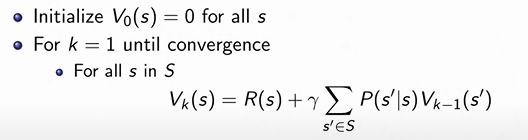 <br>
_Figure 1. Dynamic Programming Approach to computing value function for an MRP._

This approach is roughly $O(|S|^{2})$ for each iteration $(|S| = N)$. Notice this equation is very similar to the rewritten value function formula in Eq. 3. It just has a few notation differences. Convergence here is determined when the change in the value functions for all states is below some threshold $\epsilon$.

# 3. Markov Decision Process (MDP)

> __Markov Decision Process (MDP)__ : markov reward process with actions (more details about definition below)

* $S$ is a (finite in this case but can be infinite) set of states $(s \in S)$
* $P$ is a dynamics/transition model $P(s_{t + 1} = s'~|~s_{t} = s, a_{t} = a)$
* $R$ is a reward function $R(s_{t} = s, a_{t} = a) = \mathbb{E}[r_{t}~|~s_{t} = s, a_{t} = a]$ with discount factor $\gamma \in [0, 1]$
* MDP is a tuple: $(S, A, P, R, \gamma)$

Note, an MRP is a tuple of $(S, P, R, \gamma)$. So for a given state, and the transition matrix, we get a reward discounted by $\gamma$. Here, the MDP tuple is: for a given state $s$, we take an action $a$. The transition matrix tells us where our next state is given we were in state $s$ taking action $a$. Discounted by $\gamma$, our reward function will tell us what reward we got for taking action $a$ in state $s$.
<br>

Now that we account for not only rewards, but also actions, we can introduce the policy $\pi$ into the framework. This policy can be deterministic or stochastic. We think of the policy as a distribution over actions: $\pi(a~|~s) = P(a_{t} = a~|~s_{t} = s)$. The $P$ here simply means probability. Don't confuse it with the transition matrix!
<br>

We know the MRP is a tuple of $(S, P, R, \gamma)$. We can say our MDP + $\pi(a~|~s)$ = MRP. And as such, we can rewrite our MDP as an MRP under policy $\pi$. 

$$
R^{\pi}(s) = \sum_{a \in A}\pi(a~|~s)R(s, a) \hspace{1em} (Eq.~5)\\
P^{\pi}(s'~|~s) = \sum_{a \in A}\pi(a~|~s)P(s'~|~s, a) \hspace{1em} (Eq.~6)\\
$$

This essentially means we can apply the methods we used to find the value function in an MRP to an MDP given a policy $\pi$.

__Dynamic Programming Approach__

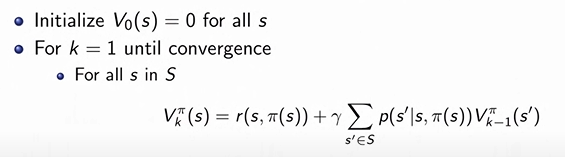 <br>
_Figure 2. Dynamic Programming Approach to computing value function for MDP._

Each iteration of this value iteration algorithm is a __Bellman backup__ for a particular policy $\pi$. Note that up till now we have only been learning how to calculate the value function for _a_ policy. We have not gotten to the control part yet (the learning/optimization/finding best policy part).

So now we focus on that!

$$
\pi^{*}(s) = \underset{\pi}{argmax}V^{\pi}(s) \hspace{1em} (Eq.~7)\\
$$

Eq. 7 is basically a mathematical formality for finding the optimal policy. It's basically saying: for a given state $s$ as input, return the index of the policy $\pi$ that maximizes the value function for state $s$ under that same policy $\pi$.

Note, that there can be a unique optimal value function. For all the Markov processes discussed, Professor Brunskill discussed them in the finite setting. For an MDP in an infinite horizon problem, the policy is deterministic, stationary, and not necessarily unique as many state-actions can have identical optimal values.

# 4. Policy Search

So now that we focus on the control problem in RL, how do we find the optimal policy? One way is through __policy search__.

For a deterministic policy, there are $|A|^{|S|}$ policies. __Policy iteration__ is more efficient than enumeration. Enumeration here means going through every single possible policy and evaluating them. 

## 4.1. Policy Iteration

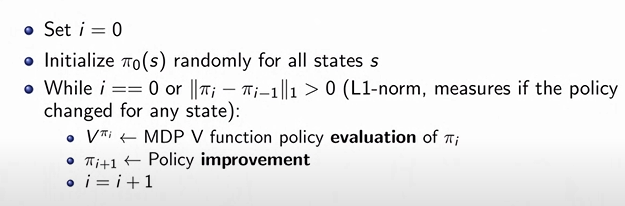 <br>
_Figure 3. Finding the optimal policy via policy iteration._

> __Policy Iteration__ : one of many methods to find the optimal policy in an MDP setting

We essentially iterate until convergence. For each iteration we calculate a value function for all states under that policy $\pi_{i}$ and improve it with the Q-function.

For __Policy improvement__, we introduce a new definition:

$$
Q^{\pi}(s, a) = R(s, a) + \gamma \sum_{s' \in S}P(s'~|~s, a)V^{\pi}(s') \hspace{1em} (Eq.~8)\\
$$

Recall, $V^{\pi}$ is the expected discounted sum of future rewards for state $s$ acting under policy $\pi$. $Q^{\pi}$ is slightly different: what is the expected discounted sum of future rewards if we took a random action, then followed policy $\pi$ from thereon?

Here's how policy improvement works!

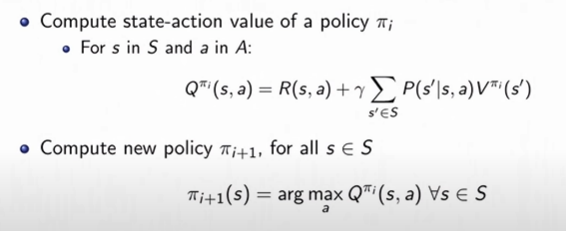 <br>
_Figure 4. Policy Improvement in Policy Iteration._

Basically, for all state-action pairs, we want to calculate the expected discounted sum of future rewards for taking an immediate random action then acting under policy $\pi$ from thereon. Our new updated policy at $i + 1$ will simply take the action that maximizes this __q-value__ for a given state.

It's important to note that the policy at $i + 1$ will always be better (or as good as) the policy at $i$.

_So why is there monotonic improvement in this algorithm?_

For this section, I won't do much explaining, but I will include important snapshots from the lecture.

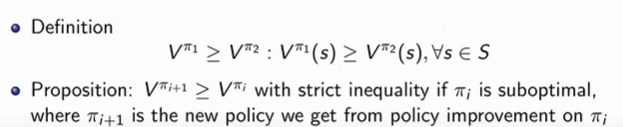 <br>
_Figure 5. Monotonic Improvement in the Policy Values._

The above simply states that we define __monotonic__ as a value function $V^{\pi_{1}}$ being greater than $V^{\pi_{2}}$ for all states. 

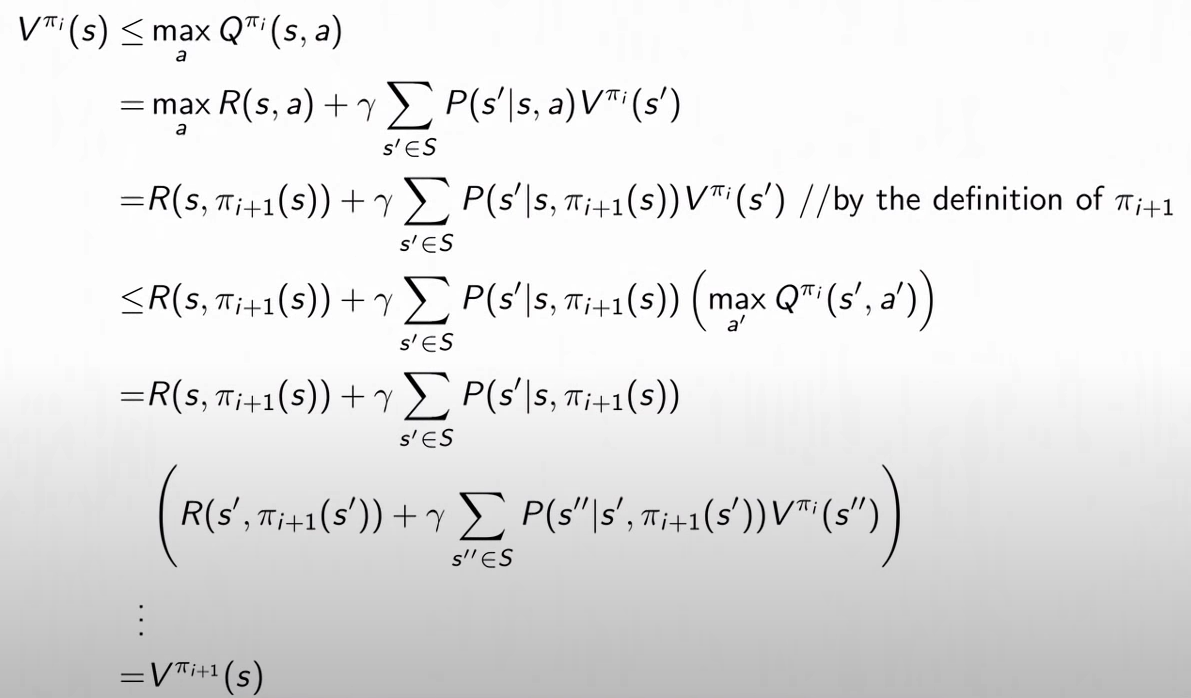 <br>
_Figure 6. Proof for monotonic improvement._

Figure 6 simply shows that if you were to recursively expand out the $Q^{\pi_{i}}(s, a)$, then you would see that the lower bound (speaking in terms of discounted sum of future rewards) is improved incrementally by the statement on the left $R(s, \pi_{i + 1}(s))$ and $R(s, \pi_{i + 1}(s'))$ and so on.

The policy iteration algorithm doesn't change after it has reached an optimum. The maximum number of iterations for policy iteration (in the worst case) is $|A|^{|S|}$ for a deterministic policy.

## 4.2. Value Iteration

For policy iteration, we computed the optimal values (and state-action values or q-values) and also the optimal policy. 

> __Value Iteration__ : another technique to find the optimal policy and optimal values (more details below)

* value iteration maintains the optimal value of starting in a state $s$ under the condition that we have a number of steps $k$ left in the episode
* it iterates to consider longer and longer episodes

Professor Brunskill defines here that a __Bellman Equation__ is any equation that has the following format:

$$
V^{\pi}(s) = R^{\pi}(s) + \gamma \sum_{s' \in S}P^{\pi}(s'~|~s)V^{\pi}(s') \hspace{1em} (Eq.~9)\\
$$

Basically, any equation that is the sum of immediate reward plus expected discounted sum of future rewards.

The __Bellman backup operator__ is simply a notation used to imply we iteratively apply the bellman equation on an existing value function to return a new and improved value function (or at worst, a value function just as good).

$$
BV(s) = \underset{a}{max}R(s, a) + \gamma \sum_{s' \in S}p(s'~|~s, a)V(s') \hspace{1em} (Eq.~10)\\
$$

Note that by applying the Bellman backup operator $B$, we are taking the action that maximizes the reward at state $s$. This is to guarantee an improvement to our value function. Eq. 10 is a general form of the bellman backup operator in use. Let's see how $B$ translates to Value Iteration.

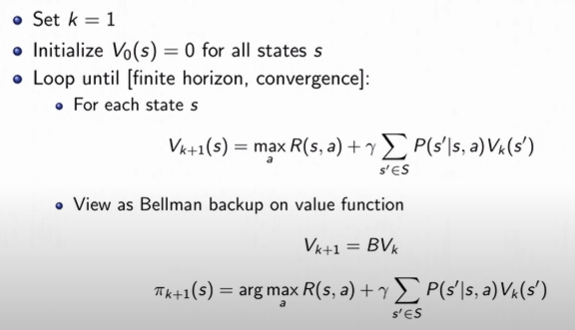 <br>
_Figure 7. Value Iteration algorithm._

The Value Iteration algorithm essentially loops until a finite horizon or a convergence. For each iteration it will calculate the value for all states and improve the policy via Bellman backup.

The Bellman backup operator for a particular policy (instead of simply the max) is denoted as $B^{\pi}$.

$$
B^{\pi}V(s) = R^{\pi}(s) + \gamma \sum_{s' \in S}P^{\pi}(s'~|~s)V(s) \hspace{1em} (Eq.~11)\\
$$

An example is shown in Eq. 11.

And as such, you can think of policy evaluation as repeatedly applying $B^{\pi}$ to the value function $V$. 

$$
V^{\pi} = B^{\pi}B^{\pi}B^{\pi}...B^{\pi}V\\
$$

Also, the lecture slides mention a __contraction operator__.

They define a contraction operator as one that satisfies: $|OV - OV'| \le |V - V'|$. Put simply, $O$ is a contraction operator as after it is applied to both value functions $V$ and $V'$, the norm difference between the 2 is smaller than before the contraction. The bellman backup operator is an example of the contraction operator. This makes sense as after applying the bellman backup once to 2 separate value functions, they should both be descending towards the same optimum (so the norm of their differences would be smaller).

The value iteration algorithm will converge for a discount factor less than 1. 

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
